<a href="https://colab.research.google.com/github/Tclack88/MountainProject/blob/master/gym_lead_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = { # 4 blocks of 2 in Feb 2020 and earlier
     '13Sep2023' : ['10a','10c','11b','10d', '11b','11a','11b(f)', '11a(f)', '10a'],
     '26Sep2023' : ['10a', '10c', '11a/b','11a/b', '10b', '10b', '12b', '11c(f)', '10a'],
     '29Sep2023' : ['10b', '10c', '10a', '11c(f)', '10d', '10d(f)','11d(f)', '11c', '10b(f)'],
     '1Oct2023': ['10b', '10c', '10a', '10a', '12a', '10c', '10a', '11d(f)', '10'], # 1 more '11d'],
     '5Oct2023' : ['10c', '10d', '11a', '12b(f)', '11b(f)', '10d', '11c', '11d(f)', '11a'], #2 more; 11d(f), 11a
     '10Oct2023' : ['10b', '10a', '11a', '12a(f)', '11a', '11b','11c(f)', '11c(f)', '11a(f)'],
     '13Oct2023' : ['10c', '10a', '10b', '11a', '12c(f)', '11b', '10b', '11c(f)', '10d'], # 1 more: '11b(f)'],
     '15Oct2023' : ['10b', '10c', '10d', '12a(f)', '11b(f)', '10b', '11d(f)', '11b(f)', '10c(f)'], # 3 more:  '10c', '10c', '10b'],
     '17Oct2023' : ['10b', '10c', '10b', '12a(f)', '10c', '11a', '11a', '11a', '11b(f)'],
     '25Oct2023': ['10a', '10d', '10c', '12a(f)', '10d', '11a', '11c(f)', '10c', '11a'],
     '2Nov2023' : ['10a', '10b', '10c', '11a', '10d', '11a', '11a', '11b(f)', '10c'],
     '7Nov2023' : ['10a', '10b', '10d', '12a(f)', '11a', '11b(f)','11b(f)', '11a', '11b(f)'],
     '10Nov2023': ['10b', '11d(TR)', '12b(TR)', '12b', '11a', '11a(f)','11b', '10c', '11b(f)'],
     '19Nov2023': ['10b', '10c', '10d', '12a','11b', '11b(f)', '11b(f)', '11a', '11a(f)'], #   2 more:  '11a(f)', '10a(f)'],
     '7Dec2023' : ['10a', '10b', '10d', '11b', '11a', '10d(f)', '11b(TR)', '11a(TR)', '11c(TRf)'],
     '15Dec2023' : ['10a', '10c', '10d', '11b', '11b(f)', '10b','11c(TR)', '10b(TR)', '11c(TRf)'], #11b was a give up, not fall, moved to 10a for a "complete"
     '17Dec2023' : ['10a', '10c', '10d', '11d(f)', '11a', '10c(f)', '11b(TR)', '10d(TR)', '10c(TR)'],
     '22Dec2023' : ['10a', '10c', '10a', '12a(f)', '11a', '10d', '11b(f)', '10d', '10d(f)'],
     '16Jan2024': ['10b', '10c', '10d', '11d', '11a(f)', '10c', '12b(TR)', '10d(TR)', 'offhandcrack (TR)'],
     '26Jan2024': ['10a', '10c', '10d', '12b(f)', '11b(f)', '10c', '11a', '11b(f)', '10a'],
     '4Feb2024': ['10a', '10d', '10d', '12a','11b(f)', '10c', '12c', '11b(f)','10c'],
     '6Feb2024': ['10a', '10c', '10d', '12a', '11b', '11b', '11c(f)', '11a', '10d'],
     '13Feb2024' : ['10c', '10d', '11a', '12c(f)', '11a', '11a', '12a(f)', '11b(f)', '10d'], # 4th set: (1 climb) TR 11c
     '31Aug2025': ['9', '10a', '10a','10b', '10b', '10c','10c', '10c', '10c'],
     '1Sep2025': ['10b', '10b', '10c', '?','?','?','10c', '10b', '11b(TR)'],
     '5Sep2025': ['10a', '10b', '10c', '11a', '10b', '10a','10d', '10a', '10b'], # 4th set: '10d', '10d', '11d(TR)
     '16Sep2025': ['10a', '10b', '10d','12a(f)', '10b', '10c', '11a', '10d', '10d'],
     '18Sep2025': ['10b', '10c', '10d', '11b', '10d', '10b', '11a(f)', '10b', '10d'],
     '24Sep2025': ['10b', '10b', '11a', '11b', '11a', '10c', '11b', '10b', '10d'],
     '26Sep2025': ['10c', '10+', '11a', '11c', '11a', '10c', '11b', '12a', '11d(TR)'],
     '30Sep2025': ['10c', '10d', '11a', '11a', '10d', '10d', '11c(f)', '10a', '11a(f)'],
     '9Oct2025':['10c', '10d', '10c','11b', '10d', '10c','11c', '11a', '10c'],
     '14Oct2025':["10c",'10c','10d','11c','10d','11a','11c(f)','10c','10b'],
     '17Oct2025':['10b','10c','11a','11c','11a','10c','11c(f)','10c','11a'],
     '21Oct2025': ['10a', '10b', '11a','11b', '11a', '11a', '11c', '11a', '10d'],
     '23Oct2025':['10a', '10b', '10d', '11d', '11c(f)', '11a', '11c', '11b', '11a'],
     '6Nov2025':['10b', '10d', '10d', '11d', '11c(f)', '10b', '11c(f)', '10c','10c'],
     '11Nov2025': ['10c', '10c', '10c','11d', '11a(f)', '10c', '11b', '11a(f)', '10b'],
     '20Nov2025': ['10b', '10d', '10d','11d', '11b(f)', '10d(f)', '11a', '11a', '11a(f)'],
     '12Dec2025': ['10b', '10c', '10c','12a', '11b', '11a', '11c', '10c(f)', '10d']

}


df = pd.DataFrame.from_dict(data).T
df

,0,1,2,3,4,5,6,7,8
13Sep2023,10a,10c,11b,10d,11b,11a,11b(f),11a(f),10a
26Sep2023,10a,10c,11a/b,11a/b,10b,10b,12b,11c(f),10a
29Sep2023,10b,10c,10a,11c(f),10d,10d(f),11d(f),11c,10b(f)
1Oct2023,10b,10c,10a,10a,12a,10c,10a,11d(f),10
5Oct2023,10c,10d,11a,12b(f),11b(f),10d,11c,11d(f),11a
10Oct2023,10b,10a,11a,12a(f),11a,11b,11c(f),11c(f),11a(f)
13Oct2023,10c,10a,10b,11a,12c(f),11b,10b,11c(f),10d
15Oct2023,10b,10c,10d,12a(f),11b(f),10b,11d(f),11b(f),10c(f)
17Oct2023,10b,10c,10b,12a(f),10c,11a,11a,11a,11b(f)
25Oct2023,10a,10d,10c,12a(f),10d,11a,11c(f),10c,11a


In [ ]:
ropes_convert = {'5': 5,'6': 6,'7': 7,'7+': 7.4,'8-': 8,'8': 8.4,'8+': 8.8,'9-': 9,'9': 9.4,'9+': 9.8,
                 '10a': 10.0, '10-': 10.1, '10a/b': 10.2, '10b': 10.3, '10': 10.4, '10b/c': 10.5, '10c': 10.6, '10+': 10.7, '10c/d': 10.8, '10d': 10.9,
                 '11a': 11.0, '11-': 11.1, '11a/b': 11.2, '11b': 11.3, '11': 11.4, '11b/c': 11.5, '11c': 11.6, '11+': 11.7, '11c/d': 11.8, '11d': 11.9,
                 '12a': 12.0, '12-': 12.1, '12a/b': 12.2, '12b': 12.3, '12': 12.4, '12b/c': 12.5, '12c': 12.6, '12+': 12.7, '12c/d': 12.8, '12d': 12.9,
                 '13a': 13.0, '13-': 13.1, '13a/b': 13.2, '13b': 13.3, '13': 13.4, '13b/c': 13.5, '13c': 13.6, '13+': 13.7, '13c/d': 13.8, '13d': 13.9,
                 '14a': 14.0, '14-': 14.1, '14a/b': 14.2, '14b': 14.3, '14': 14.4, '14b/c': 14.5, '14c': 14.6, '14+': 14.7, '14c/d': 14.8, '14d': 14.9,
                 '15a': 15.0 ,'15-': 15.1, '15a/b': 15.2, '15b': 15.3, '15': 15.4, '15b/c': 15.5, '15c': 15.6, '15+': 15.7, '15c/d': 15.8, '14d': 14.9}

def ignore_fails(val):
  "also ignores TR"
  return val.split('(')[0]

def remove_fails(val):
  "also removes TR"
  if '(' in val:
    return None
  return val

def convert_grades(val):
  try:
    return ropes_convert[val]
  except:
    # print(f"error with: {val}")
    return None

In [ ]:
df1 = df.map(remove_fails)
df1 = df1.map(convert_grades)
avg = round(df1.mean(axis=1),1)
peak = df1.max(axis=1)
top3 = df1.apply(lambda row: round(row.nlargest(3).mean(),1), axis=1)
df1['avg'] = avg
df1['peak'] = peak
df1['top3'] = top3
df1 = df1.reset_index(names='date')
df1

,date,0,1,2,3,4,5,6,7,8,avg,peak,top3
0,13Sep2023,10.0,10.6,11.3,10.9,11.3,11.0,NaN,NaN,10.0,10.7,11.3,11.2
1,26Sep2023,10.0,10.6,11.2,11.2,10.3,10.3,12.3,NaN,10.0,10.7,12.3,11.6
2,29Sep2023,10.3,10.6,10.0,NaN,10.9,NaN,NaN,11.6,NaN,10.7,11.6,11.0
3,1Oct2023,10.3,10.6,10.0,10.0,12.0,10.6,10.0,NaN,10.4,10.5,12.0,11.1
4,5Oct2023,10.6,10.9,11.0,NaN,NaN,10.9,11.6,NaN,11.0,11.0,11.6,11.2
5,10Oct2023,10.3,10.0,11.0,NaN,11.0,11.3,NaN,NaN,NaN,10.7,11.3,11.1
6,13Oct2023,10.6,10.0,10.3,11.0,NaN,11.3,10.3,NaN,10.9,10.6,11.3,11.1
7,15Oct2023,10.3,10.6,10.9,NaN,NaN,10.3,NaN,NaN,NaN,10.5,10.9,10.6
8,17Oct2023,10.3,10.6,10.3,NaN,10.6,11.0,11.0,11.0,NaN,10.7,11.0,11.0
9,25Oct2023,10.0,10.9,10.6,NaN,10.9,11.0,NaN,10.6,11.0,10.7,11.0,11.0


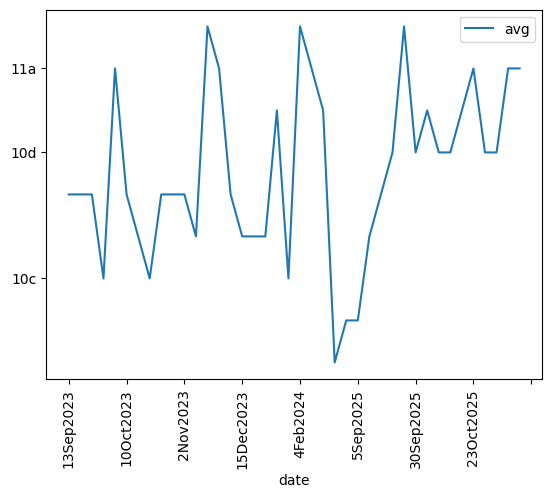

In [ ]:
ax = df1.plot(x='date',y='avg')
ax.set_yticks([10,10.2,10.5,10.8,11,11.2,11.5,11.8,12,12.2,12.5,12.8])
ax.set_yticklabels('10a 10b 10c 10d 11a 11b 11c 11d 12a 12b 12c 12d'.split())
plt.xticks(rotation=90)
ax.autoscale()